# 월간 데이콘; KOSPI 기반 분석 시각화 경진대회

## Goal
---

### 타 국가와의 상관관계

우리나라는 수출 의존도가 높은 국가로, 다른 국가의 경제 상황에 영향을 많이 받습니다.

따라서 주요 국가들의 지수 등락률과 코스피의 등락률이 관계가 있는지 살펴보았습니다.

### 원자재와의 상관관계

금/원유와 같은 원자재와의 상관관계도 분석했습니다.

### 갭 상승 / 갭 하락과의 상관관계

'갭'이라고 해서, 전날의 종가와 당일의 시가에 차이가 많이 나는 경우를 말합니다.

차트로 볼 때 전날의 종가와 당일의 시가 사이에 빈 공간이 생기기 때문에 '갭'이라는 용어가 생겨났는데,

혹자는 이렇게 '갭'이 생겼을 때 주가는 방향성을 갖는다고 말합니다.

정말 그러한지 한번 살펴보도록 하겠습니다.


## Index
---
1. 타 국가 지수와의 비교

2. 금, 원유와의 비교

3. 갭과의 상관관계

4. 종합 정리 / 인사이트

## Abstract
---


In [154]:
# 필요한 라이브러리 설치

!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [155]:
# 필요한 라이브러리 다운로드
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 무시
# import warnings
# warnings.filterwarnings(action='ignore')


In [156]:
# 데이터 살펴보기
kospi_data = pd.read_csv('kospi_data.csv')
kospi_data.head()

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


In [157]:
kospi_data.tail()
# 1981년 5월 1일부터 2022년 8월 31일까지의 데이터가 존재하는 것을 알 수 있습니다.

,Date,Close,Open,High,Low,Volume,Change
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099
11023,2022-08-31,2472.05,2433.47,2473.75,2426.14,397290.0,0.0086


# 1. 타 국가와의 상관관계 알아보기
---

타 국가 지수로는

- 항셍지수
- 나스닥 지수
- 다우존스 지수
- 니케이225 지수

를 선택했습니다.

이 지수들의 등락률과 코스피 지수의 등락률이 관계가 있는지 살펴보겠습니다.

---

이 분석에서, 등락률을 뜻하는 `Change` 는 '전일 대비 등락률'로 정의합니다.

현재 kospi 데이터는 당일 시가와 당일 종가를 활용하여 '당일 등락률'을 나타내고 있습니다. 그러나 이런 방식을 채택할 경우

전일 종가 대비 당일 시가와의 차이를 반영하지 못하게 됩니다.

따라서 `Change` 열을 전일 종가와 당일 종가를 활용하여 '전일 대비 등락률'로 변경하여 분석하겠습니다.

In [158]:
# 날짜 선언
start_date = '1981-05-01'
end_date = '2022-09-01'

# 데이터 전처리
def data_preprocessing(ticker):
    # 데이터 받아오기
    ticker_df = yf.Ticker(ticker)
    data = ticker_df.history(start=start_date, end=end_date)

    # 이번 분석에서 사용하지 않는 열 삭제
    data.drop(['Volume', 'Dividends', 'Stock Splits', 'High', 'Low'], axis=1, inplace=True)
    
    # 전일 대비 등락률 계산을 위해 전일 종가 기록
    data['Prev Close'] = data['Close'].shift(1)
    # 전일 대비 등락률, 누적 등락률 추가
    data['Change'] = ((data['Close'] / data['Prev Close']) - 1) * 100
    data['Cumulative Return'] = ((data['Close'] / data['Close'].iloc[0]) - 1) * 100

    
    # 인덱스 초기화 + Date 형식 일치
    data = data.reset_index()
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
    data['Date'] = pd.to_datetime(data['Date'])

    return data

# 항셍 지수
hsi = data_preprocessing('^HSI')
# 나스닥 지수
nasdaq = data_preprocessing('^IXIC')
# 다우존스 지수
doj = data_preprocessing('^DJI')
# 니케이 지수
nikkei = data_preprocessing('^N225')

# 코스피 데이터를 다른 지수 데이터와 형태 맞춰주기
kospi = kospi_data.copy()
kospi['Date'] = pd.to_datetime(kospi['Date'])
kospi['Prev Close'] = kospi['Close'].shift(1)
kospi['Change'] = ((kospi['Close'] / kospi['Prev Close']) - 1) * 100
kospi['Cumulative Return'] = ((kospi['Close'] / kospi['Close'].iloc[0] - 1) * 100)

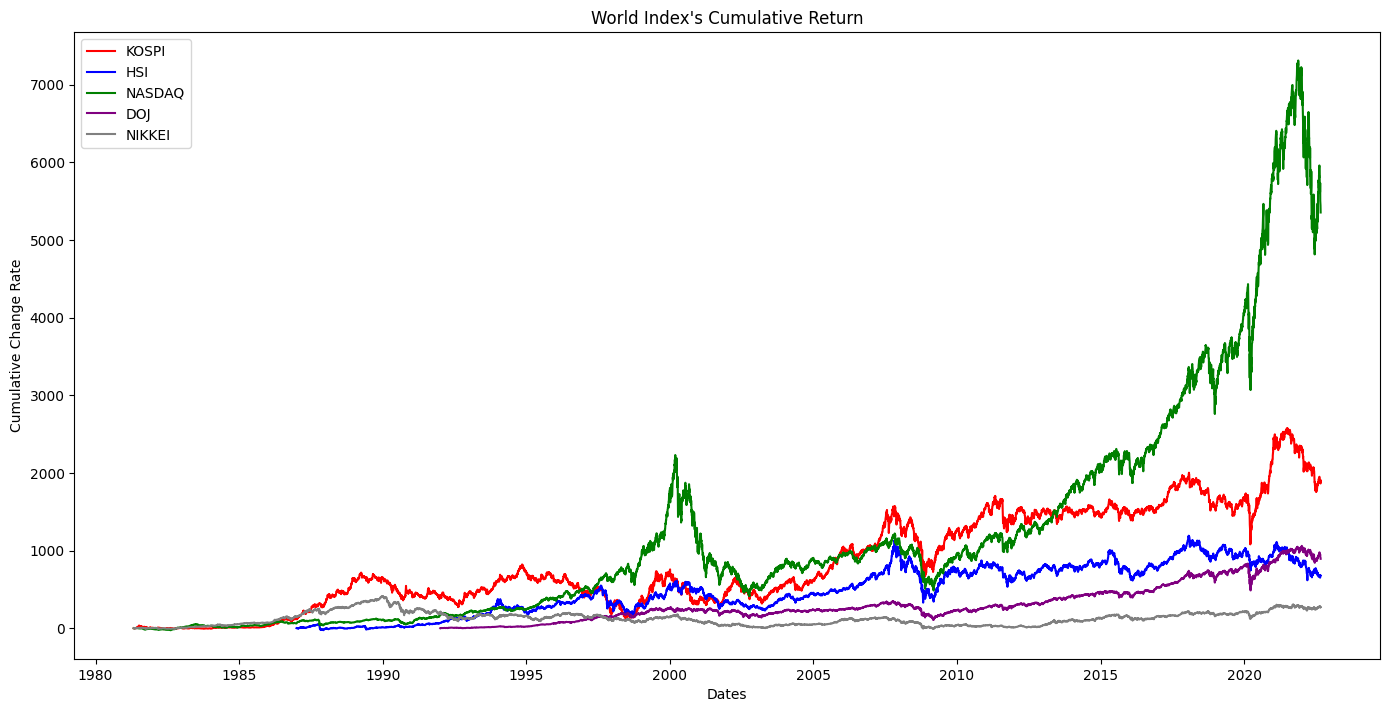

In [159]:
# 시각화
def draw_cumulative_graph(data, label, color):
    plt.figure(figsize=(14, 7))

    # 파라미터로 받은 리스트를 바탕으로 그래프 그리기
    for i in range(len(data)):
        plt.plot(data[i]['Date'], data[i]['Cumulative Return'], label=label[i], color=color[i])
    
    plt.xlabel('Dates')
    plt.ylabel('Cumulative Change Rate')
    plt.legend(loc='upper left')
    plt.tight_layout()

data_list = [kospi, hsi, nasdaq, doj, nikkei]
label_list = ['KOSPI', 'HSI', 'NASDAQ', 'DOJ', 'NIKKEI']
color_list = ['red', 'blue', 'green', 'purple', 'gray']

draw_cumulative_graph(data_list, label_list, color_list)
plt.title("World Index's Cumulative Return")
plt.show()

## 그래프를 살펴보면...
---

올라가는 시기와 내려가는 시기는 서로 비슷합니다. 그러나 그 폭은 각 지수가 다른 것 같은데요, 히트맵 상관관계 분석으로 한번 그 관계성을 알아보고자 합니다.

주식의 추세에는 단기 추세와 장기 추세가 있습니다. 단기적으로 하락하더라도 장기적으로 상승하는 추세라면, 곧 다시 상승할 수 있을 것이라는 예측이 가능합니다.

이를 바탕으로, 단기 추세 상관관계 분석에는 `Change` 열을 활용,

장기 추세 상관관계 분석에는 `Cumulative Return` 열을 활용하고자 합니다.

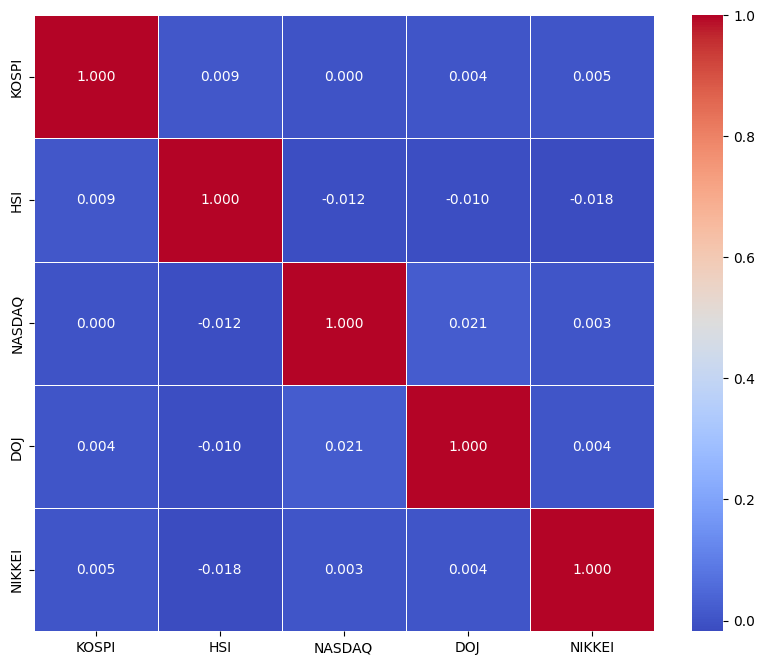

In [160]:
# 단기 추세 상관관계 분석
def draw_heatmap(key_list, value_list):
    tmp_dict = {}

    # 파라미터로 받은 리스트를 딕셔너리에 하나씩 삽입
    for key, value in zip(key_list, value_list):
        tmp_dict[key] = value
    
    # 상관분석 후 히트맵 그리기
    corr_matrix = pd.DataFrame(tmp_dict).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
    plt.show()

keys = ['KOSPI', 'HSI', 'NASDAQ', 'DOJ', 'NIKKEI']
values = [kospi['Change'], hsi['Change'], nasdaq['Change'], doj['Change'], nikkei['Change']]

draw_heatmap(keys, values)


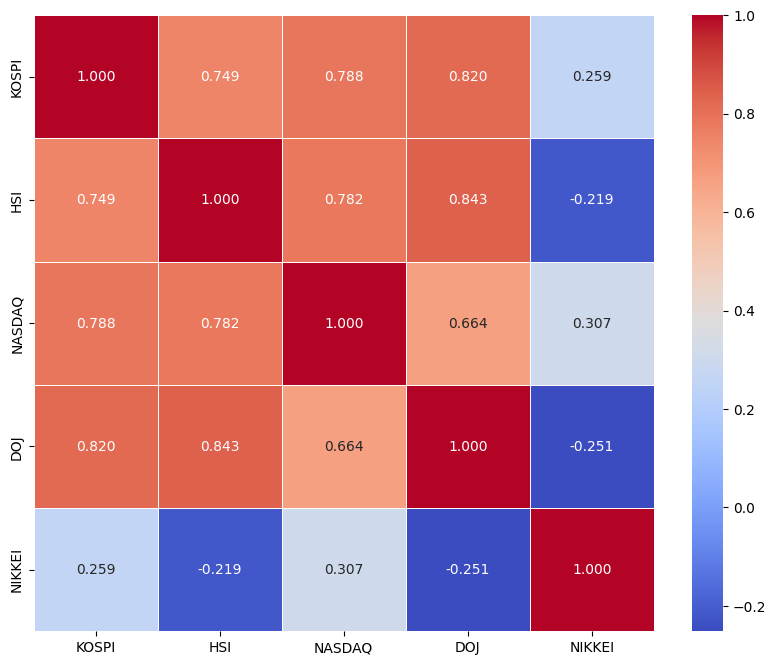

In [161]:
# 장기 추세 상관관계 분석
values = [kospi['Cumulative Return'], \
        hsi['Cumulative Return'], \
        nasdaq['Cumulative Return'], \
        doj['Cumulative Return'], \
        nikkei['Cumulative Return']]

draw_heatmap(keys, values)


## 히트맵을 살펴보면...

---

단기 추세 히트맵에서는 `코스피` / `항셍` / `나스닥` / `다우존스` / `니케이` 모두 상관 관계가 없는 것으로 보입니다.

그러나 장기 추세를 보면, `니케이`를 제외한 모든 지수들이 서로 강한 상관 관계를 갖고 있다는 것을 볼 수 있습니다.

우리가 중점적으로 살펴봐야 할 `코스피` 또한 `니케이` 를 제외하면 다른 지수와 **0.7 이상의 강한 상관 관계**를 가지고 있다고 분석할 수 있습니다.

단기적으로는 각 국가별 지수가 영향을 주고받지 않지만

특정 사건 (전염병, 전쟁, 금융위기) 의 경우 전 세계가 이를 공유하기 때문에 장기적으로는 강한 상관 관계를 띈다고 볼 수 있습니다.

따라서 이러한 분석을 바탕으로 한다면,

다른 지수가 하락하거나 상승한다면, 코스피도 머잖아 그럴 것이라는 추측이 가능합니다.

# 2. 금 / 원유와의 비교
---

각 지수와 코스피가 장기적으로는 상관 관계를 가지고 있다는 것을 알았습니다.

그렇다면 대표적인 원자재인 금 혹은 원유와도 코스피는 상관 관계를 가지고 있을까요?

1번 항목과 똑같이 그래프로 살펴보고, 히트맵으로 또 살펴보도록 하겠습니다.

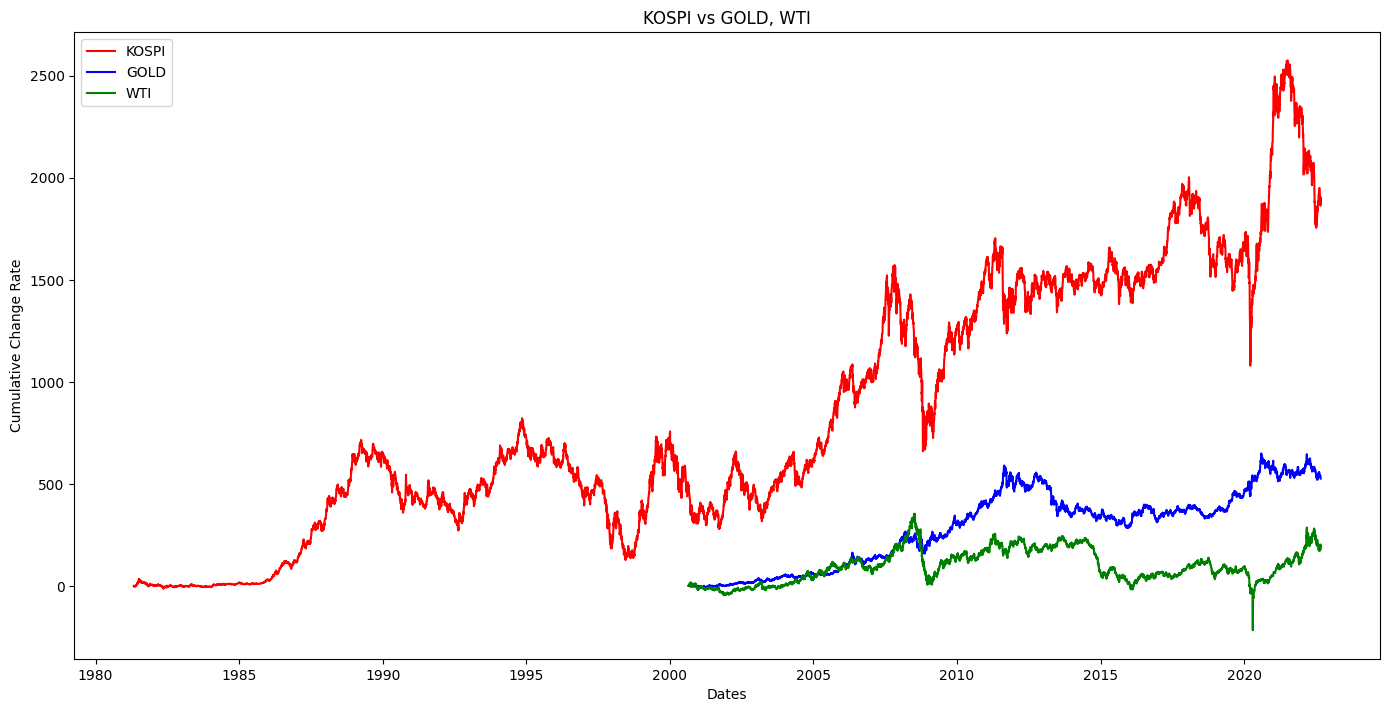

In [162]:
# 금 데이터
gold = data_preprocessing('GC=F')
# 원유 데이터
wti = data_preprocessing('CL=F')

# 그래프 그리기
data_list = [kospi, gold, wti]
label_list = ['KOSPI', 'GOLD', 'WTI']
color_list = ['red', 'blue', 'green']

draw_cumulative_graph(data_list, label_list, color_list)
plt.title('KOSPI vs GOLD, WTI')
plt.show()


## 그래프를 살펴보면...
---

`WTI`의 경우 코스피가 과대낙폭을 기록할 때 같이 하락하는 듯 하나, 상승할 땐 같이 상승하지 않는 것 같아보입니다.

`GOLD`는 코스피가 과대낙폭을 기록할 때 잘 떨어지지 않지만, 상승할 때 같이 상승하는 듯 보입니다.

히트맵으로도 한번 살펴보겠습니다.

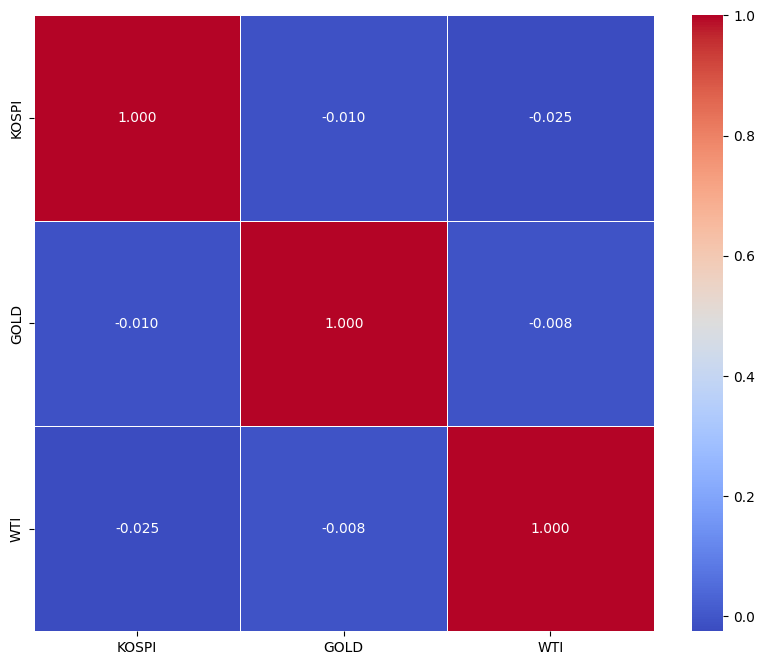

In [163]:
# 히트맵 그리기

keys = ['KOSPI', 'GOLD', 'WTI']
# 단기 변동성 상관관계
values = [kospi['Change'], gold['Change'], wti['Change']]

draw_heatmap(keys, values)

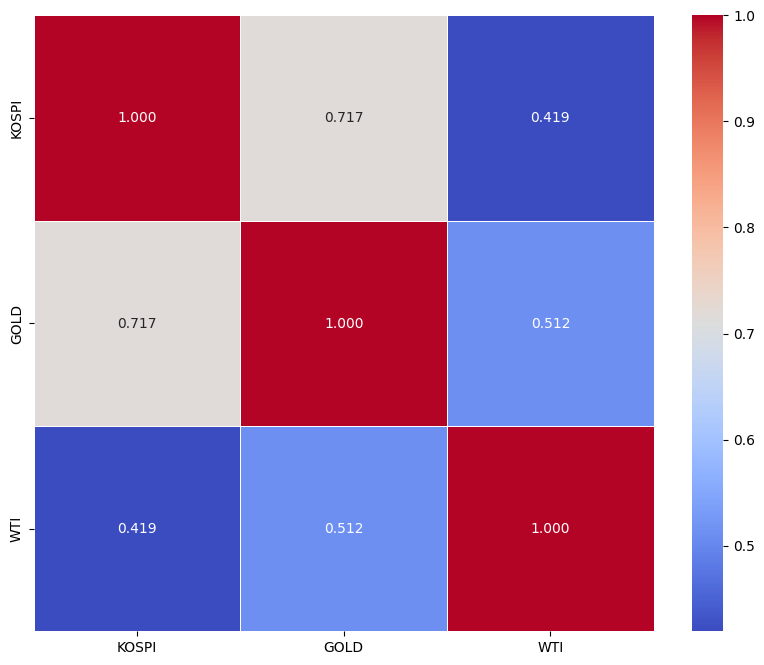

In [164]:
# 장기 변동성 상관관계
values = [kospi['Cumulative Return'], gold['Cumulative Return'], wti['Cumulative Return']]

draw_heatmap(keys, values)

## 히트맵을 살펴보면...

코스피는 `WTI` 보다 `GOLD`와의 상관성이 더 강한 것을 알 수 있습니다.

# 3. 갭과의 상관관계
---

주식시장엔 '갭'이란 것이 있습니다.

전날의 종가와 당일의 시가가 차이가 크면, 차트 상으로 그 사이의 공간이 비어있는 것으로 나타납니다.

이를 '갭'이라고 하는데요, 주식 시장이 마감하고 다시 개장되기까지의 시간 사이에 주식에 큰 영향을 미치는 사건이 발생할 경우 종종 '갭'이 나타납니다.

상승 갭 혹은 하락 갭이 발생하고 나면 변동성이 더 심해져, 그 속에서 알파를 찾을 가능성이 더 높다고 여겨집니다.

> 전날의 종가와 당일의 시가가 3% 이상 차이나면 갭이 발생한 것으로 정의했습니다.

**따라서 `Volume` 열과 `High`, `Low`열을 활용해**

- 갭 발생 후 5 영업일 (일주일) 동안의 평균 거래량이 갭 발생 이전 평균 거래량을 상회하는가?

- 갭 발생 후 5 영업일 (일주일) 동안의 최고가 - 최저가의 폭이 이전 폭을 상회하는가?

를 알아보고자 합니다.

In [165]:
# is gap 열 생성
def is_gap(open, close):
    gap = ((open / close) - 1) * 100
    # 갭 발생 시 1 반환
    if gap > 3 or gap < -3:
        return 1
    # 이외의 경우 0 반환
    else:
        return 0

kospi['Is Gap'] = kospi.apply(lambda row: is_gap(row['Open'], row['Prev Close']), axis=1)
gap_count = 0
for idx, row in kospi.iterrows():
    if row['Is Gap'] == 1:
        gap_count += 1
gap_count

193

In [166]:
each_gap = []
'''
특정 기간동안 갭은 여러번 발생할 수 있습니다.
각각의 갭이 발생했을 경우

- 갭이 발생한 영업일을 포함하여 이후 5 영업일 동안의 데이터
- 갭이 발생한 영업일을 포함하지 않고 이전 5 영업일 동안의 데이터

를 하나의 딕셔너리에 묶은 후,
each_gap 리스트에 저장하여 활용하고자 합니다.
'''
gap_index = 0

for idx, row in kospi.iterrows():
    if row['Is Gap'] == 1:
        # 갭이 발생한 행을 포함한 5 영업일 이후의 데이터 가져오기
        after_gap = kospi.iloc[idx: min(idx + 5, len(kospi))]
        after_gap.reset_index(drop=True, inplace=True)

        # 갭이 발생한 행을 포함하지 않은 5 영업일 이전의 데이터 가져오기
        before_gap = kospi.iloc[max(idx - 5, 0): idx]
        before_gap.reset_index(drop=True, inplace=True)

        # 각각의 갭을 딕셔너리로 묶고, 리스트에 저장
        gap_dict = {
            f'before_{gap_index}th_gap': before_gap,
            f'after_{gap_index}th_gap': after_gap
        }
        each_gap.append(gap_dict)

        gap_index += 1

each_gap[0]['after_0th_gap']

,Date,Close,Open,High,Low,Volume,Change,Prev Close,Cumulative Return,Is Gap
0,1981-06-18,134.8,134.8,134.8,134.8,1170000.0,-3.369176,139.5,9.061489,1
1,1981-06-19,138.6,138.6,138.6,138.6,1530000.0,2.818991,134.8,12.135922,0
2,1981-06-20,139.8,139.8,139.8,139.8,1560000.0,0.865801,138.6,13.106796,0
3,1981-06-22,138.8,138.8,138.8,138.8,1380000.0,-0.715308,139.8,12.297735,0
4,1981-06-23,139.2,139.2,139.2,139.2,1390000.0,0.288184,138.8,12.621359,0


---

1981년부터 2022년까지의 갭이 기록되어 있기 때문에

각각의 갭이 발생했을 때 당시 코스피의 평균 거래량, 평균 가격 변동성이 모두 제각각일 것이라 생각합니다.

따라서 갭이 발생한 직후의 5영업일 동안의 거래량 변화와 가격 변동성을 비교할 수 있는 바로미터를

갭이 발생하기 직전 5영업일 동안의 거래량 변화와 가격 변동성으로 설정했습니다.

---

In [180]:
before_volume = []
after_volume = []
ratio_list = []

# 갭이 발생하기 이전과 이후 각각의 평균 거래량 구해서 리스트에 삽입
for i in range(len(each_gap)):
    before = each_gap[i][f'before_{i}th_gap']['Volume'].mean()
    after = each_gap[i][f'after_{i}th_gap']['Volume'].mean()
    
    before_volume.append(before)
    after_volume.append(after)

# 비율 변화 알아보기
for i in range(len(before_volume)):
    before = before_volume[i]
    after = after_volume[i]
    ratio = ((after / before) - 1) * 100

    ratio_list.append(ratio)

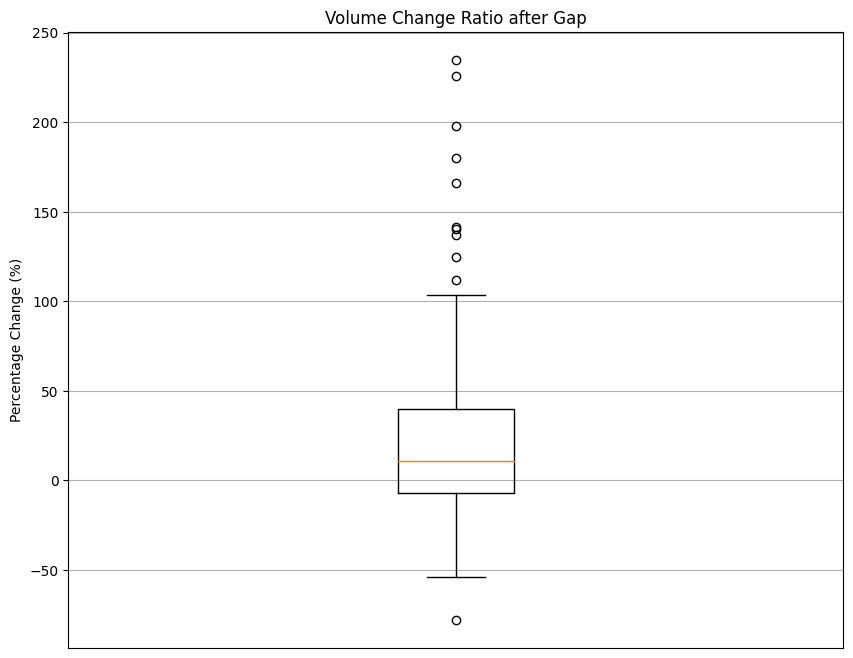

mean:  21.072997779026704
median:  10.895091434071213
1Q:  -6.991426862497507
3Q:  40.0773422394094


In [182]:
# 박스플롯과 실제 수치로 살펴보기
plt.figure(figsize=(10, 8))
plt.boxplot(ratio_list)
plt.title('Volume Change Ratio after Gap')
plt.xticks([])
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()

print('mean: ', sum(ratio_list) / len(ratio_list))
print('median: ', np.median(ratio_list))
print('1Q: ', np.percentile(ratio_list, 25))
print('3Q: ', np.percentile(ratio_list, 75))

In [ ]:
before_change = []
after_change = []
change_list = []

'''
갭이 발생하기 이전과 이후 각각의 가격 변동성을 알아보고자 합니다
갭이 발생하기 전 5일을 기준으로 저가와 고가를 각각 추려냅니다

즉, 5일동안 있었던 가격 변동 중 가장 낮았던 가격과 가장 높았던 가격을 추려낸 다음
이들의 차이를 구해 before_change와 after_change에 각각 저장합니다.

갭 이전의 최대 가격 변동폭과, 갭 이후의 최대 가격 변동폭을 구했습니다.
이 폭의 비율 변화를 통해
각 갭이 발생했을 때 가격 변화가 얼마나 일어났는지 알아보려 합니다.
'''
for i in range(len(each_gap)):
    before = each_gap[i][f'before_{i}th_gap']['Volume'].mean()
    after = each_gap[i][f'after_{i}th_gap']['Volume'].mean()
    
    before_volume.append(before)
    after_volume.append(after)

# 비율 변화 알아보기
for i in range(len(before_volume)):
    before = before_volume[i]
    after = after_volume[i]
    ratio = ((after / before) - 1) * 100

    ratio_list.append(ratio)